# Lab 8 - 24/11

Link github: https://github.com/ilariavascotto/UL_2023_fall

## Ex 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings
import myfunctions as f

In [2]:
# Load data
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    data = np.array(pd.read_csv('Datasets/s3.txt', sep = '    ', header=None))

### K-means

In [3]:
runs = 20
losses = np.zeros(runs)
for i in range(runs):
    _ , losses[i], _ = f.k_means(data, 15, init = 'def')

print(f"\nThe minimum value of the loss is {np.min(losses)}")
print(f"The maximum value of the loss is {np.max(losses)}")
print(f"The average value of the loss is {np.mean(losses)}")


The minimum value of the loss is 16889702480622.0
The maximum value of the loss is 23501486028979.0
The average value of the loss is 19684404530936.9


In [4]:
losses_plus = np.zeros(runs)
for i in range(runs):
    _ , losses_plus[i], _ = f.k_means(data, 15, init = 'k++')

print(f"\nThe minimum value of the loss is {np.min(losses_plus)}")
print(f"The maximum value of the loss is {np.max(losses_plus)}")
print(f"The average value of the loss is {np.mean(losses_plus)}")


The minimum value of the loss is 16889985225546.0
The maximum value of the loss is 21082095187748.0
The average value of the loss is 18938834257084.15


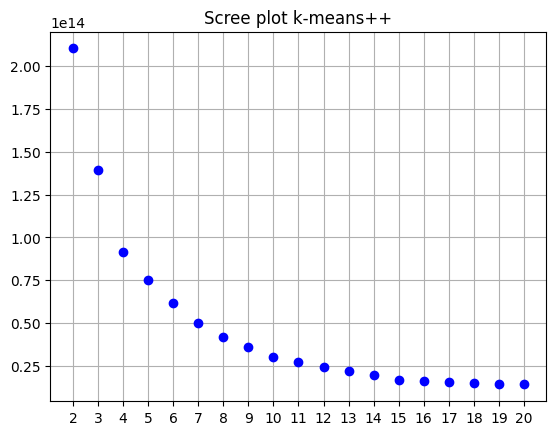

In [5]:
best_losses_pp = np.zeros(19)
for t in range(2,21):
    losses_plus = np.zeros(runs)
    for i in range(runs):
        _ , losses_plus[i], _ = f.k_means(data, t, init = 'k++')
    best_losses_pp[t-2] = np.min(losses_plus)

plt.plot([i for i in range(2,21)], best_losses_pp, 'bo')
plt.title("Scree plot k-means++")
plt.xticks([i for i in range(2,21)])
plt.grid()
plt.show()

### K-medoids

In [6]:
losses_medoids = np.zeros(runs)
for i in range(runs):
    _ , losses_medoids[i], _ = f.k_medoids(data, 15, init = 'k++')

print(f"\nThe minimum value of the loss is {np.min(losses_medoids)}")
print(f"The maximum value of the loss is {np.max(losses_medoids)}")
print(f"The average value of the loss is {np.mean(losses_medoids)}")


The minimum value of the loss is 16986069185009.0
The maximum value of the loss is 22200424427560.0
The average value of the loss is 20208006469466.3


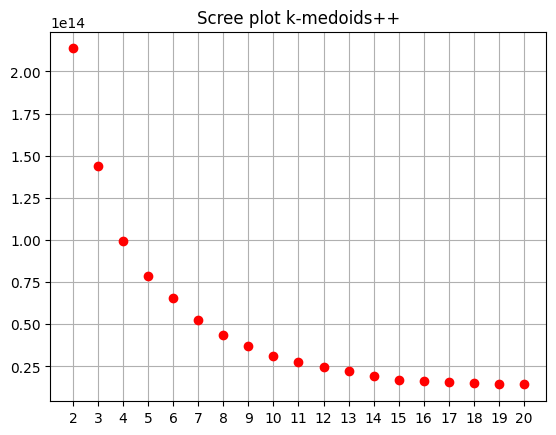

In [7]:
best_losses_medoids = np.zeros(19)
for t in range(2,21):
    losses_medoids = np.zeros(runs)
    for i in range(runs):
        _ , losses_medoids[i], _ = f.k_medoids(data, t, init = 'k++')
    best_losses_medoids[t-2] = np.min(losses_medoids)

plt.plot([i for i in range(2,21)], best_losses_medoids, 'ro')
plt.title("Scree plot k-medoids++")
plt.xticks([i for i in range(2,21)])
plt.grid()
plt.show()

### C-means

In [8]:
losses_cmeans = np.zeros(runs)
for i in range(runs):
    _ , losses_cmeans[i], _ = f.c_means(data, 15, f = 2)

print(f"\nThe minimum value of the loss is {np.min(losses_cmeans)}")
print(f"The maximum value of the loss is {np.max(losses_cmeans)}")
print(f"The average value of the loss is {np.mean(losses_cmeans)}")


The minimum value of the loss is 7988108819372.93
The maximum value of the loss is 8666700249379.023
The average value of the loss is 8181879827571.714


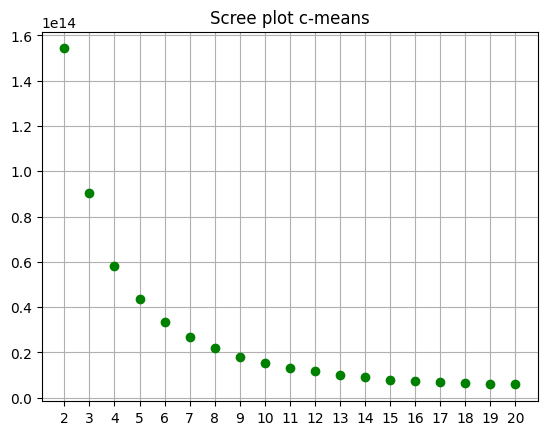

In [9]:
best_losses_cmeans = np.zeros(19)
for t in range(2,21):
    losses_cmeans = np.zeros(runs)
    for i in range(runs):
        _, losses_cmeans[i], _ = f.c_means(data, t, f = 2)
    best_losses_cmeans[t-2] = np.min(losses_cmeans)

plt.plot([i for i in range(2,21)], best_losses_cmeans, 'go')
plt.title("Scree plot c-means")
plt.xticks([i for i in range(2,21)])
plt.grid()
plt.show()

### Summary

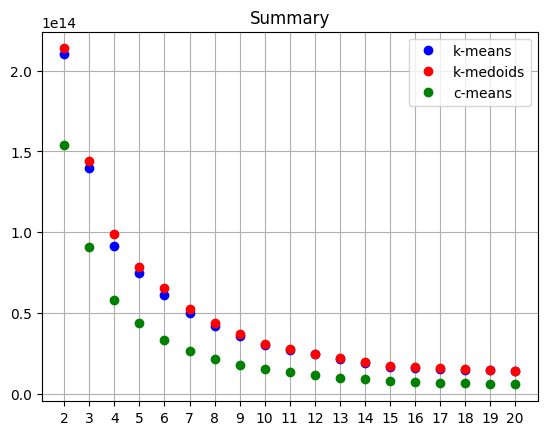

In [10]:
plt.title("Summary")
plt.plot([i for i in range(2,21)], best_losses_pp, 'bo')
plt.plot([i for i in range(2,21)], best_losses_medoids, 'ro')
plt.plot([i for i in range(2,21)], best_losses_cmeans, 'go')
plt.xticks([i for i in range(2,21)])
plt.legend(['k-means', 'k-medoids', 'c-means'])
plt.grid()
plt.show()